# Heritability

In [28]:
import matplotlib.pyplot as plt
import estaudel.escaffolding as escaffolding
import glob
from sklearn import linear_model
import numpy as np

# Data

To generate the data use the content of heritability.condor

In [2]:
data = [escaffolding.load(x) for x in glob.glob("out/heritability*.pkle") if 'last' not in x]

# Figure

(200,) (200,)
[0.11217637] 0.49707218488492133
(200,) (200,)
[0.98014775] 0.028384420164541735


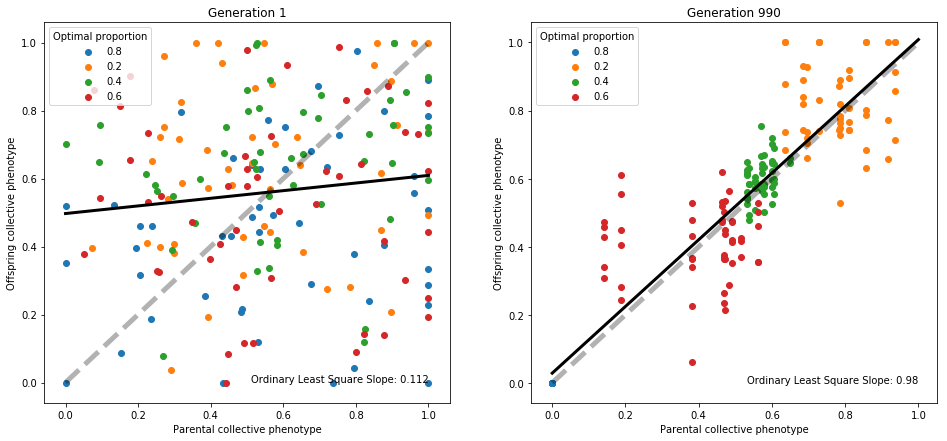

In [133]:
fig, ax = plt.subplots(1,2, figsize=(16,7))

for i, gen in enumerate([1, 990]):
    all_x = []
    all_y = []
    ax[i].set(title='Generation {}'.format(gen), xlabel='Parental collective phenotype', ylabel='Offspring collective phenotype')
    for d in data:
        y = d.data['cp_value'][gen,:]
        x = [d.data['cp_value'][gen-1,i] for i in data[0].parents[gen]]
        all_x.append(x)
        all_y.append(y)
        ax[i].scatter(x,y, label=d.parameters['goal'])
    ax[i].legend(title="Optimal proportion", loc='upper left')
    ax[i].plot([0,1],[0,1], ls='--', color='k', lw=5, alpha=0.3)

    all_x = np.concatenate(all_x)
    all_y = np.concatenate(all_y)
    lm = linear_model.LinearRegression()
    lm.fit(all_x[:,np.newaxis],all_y)
    x = np.linspace(0,1)
    y = x*lm.coef_ + lm.intercept_
    ax[i].plot(x,y, color='k', lw=3)
    ax[i].text(1, 0, 'Ordinary Least Square Slope: {:1.3}'.format(lm.coef_[0]), horizontalalignment='right', )
    
fig.savefig('heritability.pdf', bbox_inches='tight')
fig.savefig('heritability.png', bbox_inches='tight')